<a href="https://colab.research.google.com/github/bimal-bp/food_retail_clustering.ipynb/blob/ML_MODELS/Food_Market_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What Is Customer Segmentation?**

Customer segmentation is the process of dividing a target market into smaller, more defined categories. It segments customers and audiences into groups that share similar characteristics such as demographics, interests, needs, or location.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

**Benifits of customer segmentation**:-

1. Create stronger marketing messages

When you know whom you’re talking to, you can develop stronger marketing messages. You can avoid generic, vague language that speaks to a broad audience. Instead, you can use direct messaging that speaks to the needs, wants, and unique characteristics of your target audience.

2. Identify the most effective marketing tactics

With dozens of marketing tactics available, it can be difficult to know what will attract your ideal audience. Using different types of market segmentation guides you toward the marketing strategies that will work best. When you know the audience you are targeting, you can determine the best solutions and methods for reaching them.

3. Design hyper-targeted ads

On digital ad services, you can target audiences by their age, location, purchasing habits, interests, and more. When you use market segmentation to define your audience, you know these detailed characteristics and can use them to create more effective, targeted digital ad campaigns.

The four bases of market segmentation are:

Demographic segmentation

Psychographic segmentation

Behavioral segmentation

Geographic segmentation

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score,davies_bouldin_score

from sklearn.manifold import TSNE
import plotly.express as px

In [91]:
df=pd.read_csv('/content/drive/MyDrive/ml_project1_data.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"58,138.000000",0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344.000000",1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613.000000",0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646.000000",1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293.000000",1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [93]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [94]:
# change all columns names to lower for easy read and write
cols_old=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
!pip install inflection

import inflection
snakecase=lambda x : inflection.underscore(x)
cols_new=list(map(snakecase,cols_old))

df.columns=cols_new
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'z_cost_contact', 'z_revenue', 'response'],
      dtype='object')

In [95]:
df['dt_customer']=pd.to_datetime(df['dt_customer'])

In [96]:
# cmp1 to cmp5 binary to categorical for easy analysyi

df['accepted_cmp1']=df['accepted_cmp1'].apply(lambda x:'yes' if x==1 else 'no')
df['accepted_cmp2']=df['accepted_cmp2'].apply(lambda x:'yes' if x==1 else 'no')
df['accepted_cmp3']=df['accepted_cmp3'].apply(lambda x:'yes' if x==1 else 'no')
df['accepted_cmp4']=df['accepted_cmp4'].apply(lambda x:'yes' if x==1 else 'no')
df['accepted_cmp5']=df['accepted_cmp5'].apply(lambda x:'yes' if x==1 else 'no')
df['complain']=df['complain'].apply(lambda x:'yes' if x==1 else 'no')

In [97]:
df.sample(5)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response
407,8890,1971,PhD,Divorced,"65,808.000000",1,1,2014-05-30,1,155,7,80,13,7,10,3,5,1,5,6,no,no,no,no,no,no,3,11,0
1755,5394,1979,Basic,Single,"16,014.000000",1,1,2013-03-17,42,3,9,4,7,8,7,4,1,1,4,3,no,no,no,no,no,no,3,11,0
1491,7494,1950,PhD,Divorced,"42,873.000000",1,1,2013-01-21,11,209,0,40,3,2,15,4,6,1,4,8,no,no,no,no,no,no,3,11,0
516,11025,1961,Graduation,Married,"36,443.000000",1,1,2013-02-03,9,65,0,46,4,3,20,4,3,1,3,8,no,no,no,no,no,no,3,11,0
544,7822,1976,Graduation,Together,"54,058.000000",0,1,2013-06-04,56,198,18,252,32,108,54,2,4,6,8,3,no,no,no,no,no,no,3,11,0


In [98]:
#missing values
df.isnull().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

In [99]:
df.shape

(2240, 29)

In [100]:
df.dropna(inplace=True)
df.shape

(2216, 29)

In [101]:
# DESCRIPTIVE STATISTICS
num_att=df.select_dtypes(include=['int64','float'])
cat_att=df.select_dtypes(exclude=['int64','float'])

In [102]:
numdes=num_att.drop('response',axis=1)
(round(numdes.describe(),2))

,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,z_cost_contact,z_revenue
count,"2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000","2,216.000000"
mean,"5,588.350000","1,968.820000","52,247.250000",0.440000,0.510000,49.010000,305.090000,26.360000,167.000000,37.640000,27.030000,43.970000,2.320000,4.090000,2.670000,5.800000,5.320000,3.000000,11.000000
std,"3,249.380000",11.990000,"25,173.080000",0.540000,0.540000,28.950000,337.330000,39.790000,224.280000,54.750000,41.070000,51.820000,1.920000,2.740000,2.930000,3.250000,2.430000,0.000000,0.000000
min,0.000000,"1,893.000000","1,730.000000",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
25%,"2,814.750000","1,959.000000","35,303.000000",0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.000000,11.000000
50%,"5,458.500000","1,970.000000","51,381.500000",0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,3.000000,11.000000
75%,"8,421.750000","1,977.000000","68,522.000000",1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.000000,11.000000
max,"11,191.000000","1,996.000000","666,666.000000",2.000000,2.000000,99.000000,"1,493.000000",199.000000,"1,725.000000",259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.000000,11.000000


In [103]:
skewness=numdes.skew()
kurtosis=numdes.kurtosis()
print(skewness)
print("*********************")
print(kurtosis)

id                       0.040459
year_birth              -0.353661
income                   6.763487
kidhome                  0.635610
teenhome                 0.407553
recency                  0.001648
mnt_wines                1.170720
mnt_fruits               2.101658
mnt_meat_products        2.025577
mnt_fish_products        1.916369
mnt_sweet_products       2.103328
mnt_gold_prods           1.839231
num_deals_purchases      2.415272
num_web_purchases        1.197037
num_catalog_purchases    1.881075
num_store_purchases      0.701826
num_web_visits_month     0.218043
z_cost_contact           0.000000
z_revenue                0.000000
dtype: float64
*********************
id                       -1.189677
year_birth                0.734670
income                  159.636700
kidhome                  -0.791164
teenhome                 -0.989619
recency                  -1.199777
mnt_wines                 0.582741
mnt_fruits                4.054082
mnt_meat_products         5.055477
mn

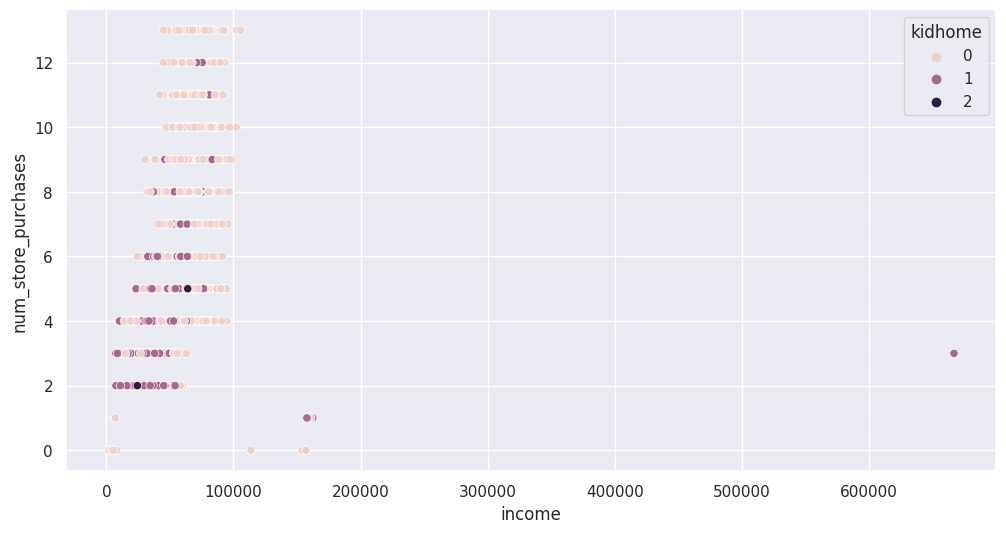

In [104]:
# FINDING OUTLIERS BY SCATTER PLOT
plt.figure(figsize=(12,6))
sns.scatterplot(x='income',y='num_store_purchases',data=df,hue='kidhome')
plt.show()

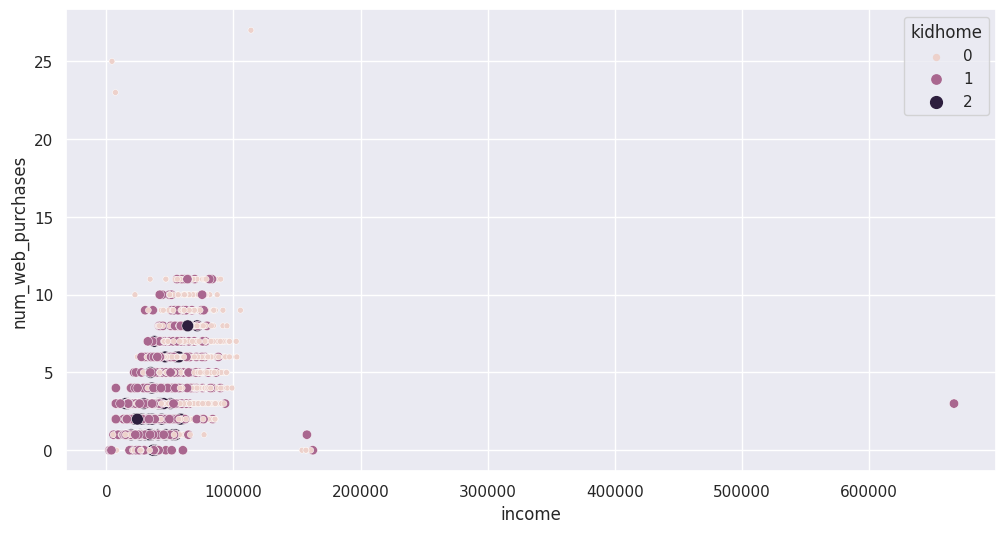

In [105]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='income',y='num_web_purchases',data=df,hue='kidhome',size='kidhome')
plt.show()

<Axes: xlabel='income', ylabel='mnt_meat_products'>

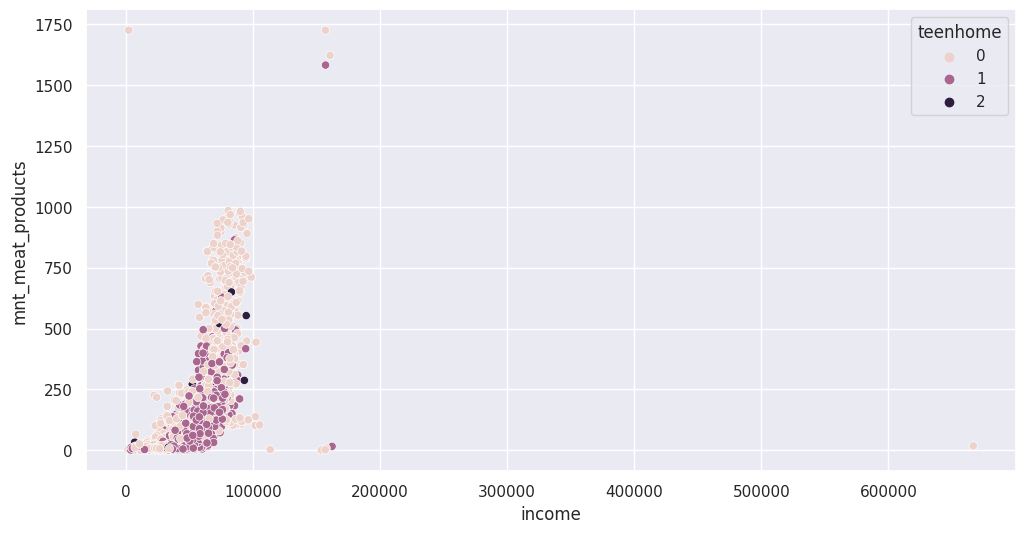

In [106]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='income',y='mnt_meat_products',data=df,hue='teenhome')

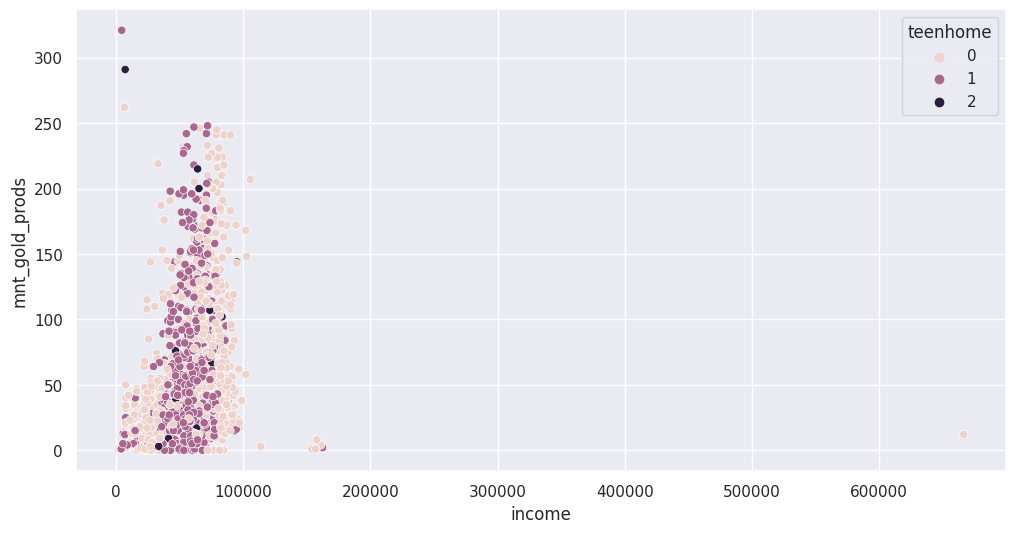

In [107]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='income',y='mnt_gold_prods',data=df,hue='teenhome')
plt.show()

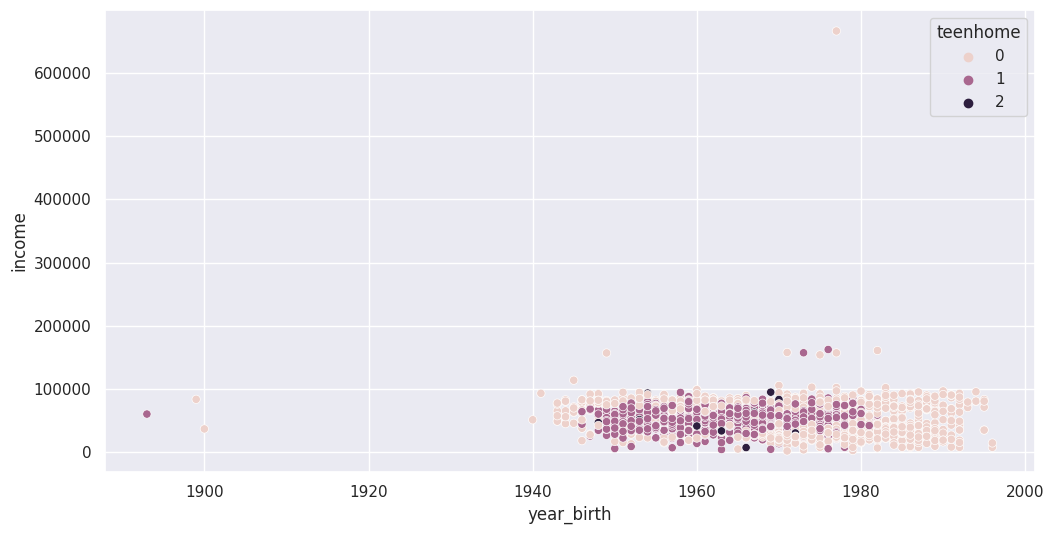

In [108]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='year_birth',y='income',data=df,hue='teenhome')
plt.show()

In [109]:
# REMOVING OUTLIERS
Q1=np.quantile(df['income'], .25)
Q3=np.quantile(df['income'], .75)
IQR=Q3-Q1

low_outliers=Q1-1.5*IQR
high_outliers=Q3+1.5*IQR

print(low_outliers)
print("***")
print(high_outliers)


-14525.5
***
118350.5


In [110]:
Q1=np.quantile(df['mnt_gold_prods'], .25)
Q3=np.quantile(df['mnt_gold_prods'], .75)
IQR=Q3-Q1

low_outliers=Q1-1.5*IQR
high_outliers=Q3+1.5*IQR

print(low_outliers)
print("***")
print(high_outliers)

-61.5
***
126.5


In [111]:
Q1=np.quantile(df['mnt_meat_products'], .25)
Q3=np.quantile(df['mnt_meat_products'], .75)
IQR=Q3-Q1

low_outliers=Q1-1.5*IQR
high_outliers=Q3+1.5*IQR

print(low_outliers)
print("***")
print(high_outliers)

-308.375
***
556.625


In [112]:
Q1=np.quantile(df['year_birth'], .25)
Q3=np.quantile(df['year_birth'], .75)
IQR=Q3-Q1

low_outliers=Q1-1.5*IQR
high_outliers=Q3+1.5*IQR

print(low_outliers)
print("***")
print(high_outliers)

1932.0
***
2004.0


In [113]:
# removes outliers
df_customer_clean = df[~((df['income'] > 100000)
                               | (df['mnt_gold_prods'] > 250)
                               | (df['mnt_meat_products'] > 1000)
                               | (df['num_web_purchases'] > 15)
                               | (df['year_birth'] <= 1900))]

print(f'We kept {round(df_customer_clean.shape[0] / df.shape[0] * 100, 2)} % of our original data')

We kept 99.1 % of our original data


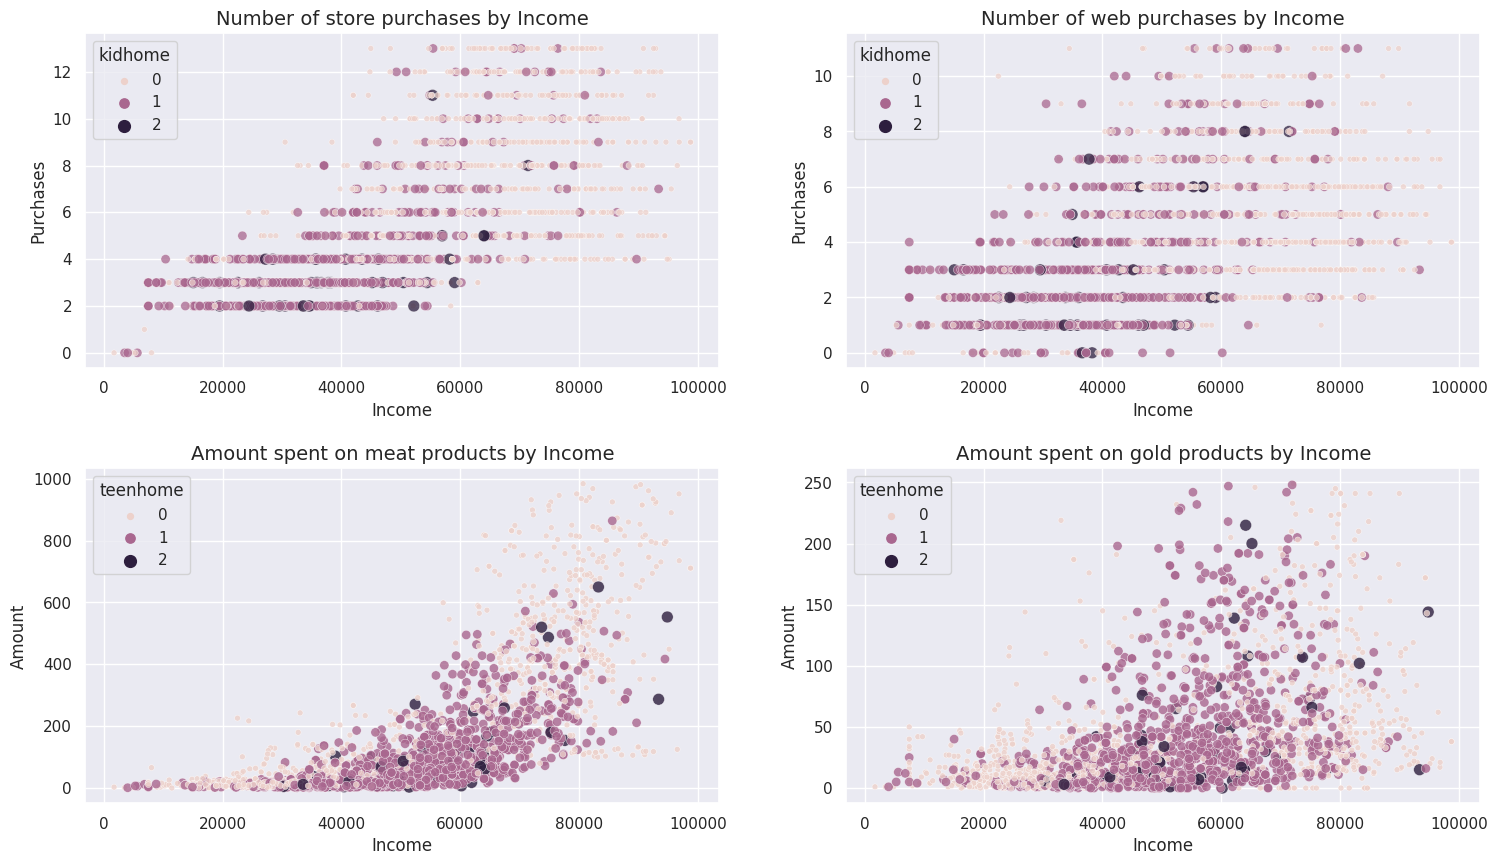

In [114]:
# sets plot size
plt.figure(figsize=(18,10))

# plots scatterplot
plt.subplot(2,2,1)
sns.scatterplot(x='income', y='num_store_purchases', data=df_customer_clean, hue='kidhome', size='kidhome', alpha=0.75)
plt.xlabel("Income")
plt.ylabel("Purchases")
plt.title("Number of store purchases by Income", fontsize=14)


# plots scatterplot
plt.subplot(2,2,2)
sns.scatterplot(x='income', y='num_web_purchases', data=df_customer_clean, hue='kidhome', size='kidhome', alpha=0.75)
plt.xlabel("Income")  # Closing parenthesis was missing here
plt.ylabel("Purchases")
plt.title("Number of web purchases by Income", fontsize=14)


# plots scatterplot
plt.subplot(2,2,3)
sns.scatterplot(x='income', y='mnt_meat_products', data=df_customer_clean, hue='teenhome', size='teenhome', alpha=0.80)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("Amount spent on meat products by Income", fontsize=14)


# plots scatterplot
plt.subplot(2,2,4)
sns.scatterplot(x='income', y='mnt_gold_prods', data=df_customer_clean, hue='teenhome', size='teenhome', alpha=0.80)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("Amount spent on gold products by Income", fontsize=14)

# adjusts spaces between plots
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.2)

# displays the plot
plt.show()


In [115]:
# calculting persong age
import datetime
now=datetime.datetime.now()
current_year=now.year

In [116]:
df['dt_customer']=pd.to_datetime(df['dt_customer'])
time_diff=now-df['dt_customer']
time_diff.index=np.arange(len(time_diff))

In [117]:
time_diff_years=[time_diff[element].days/365 for element in np.arange(len(time_diff))]

In [118]:
df['enrollment_time']=time_diff_years

In [119]:
df['enrollment_time_year']=df['dt_customer'].dt.year
df['enrollment_time_month']=df['dt_customer'].dt.month
df['enrollment_time_day']=df['dt_customer'].dt.day

In [120]:
import os

# Create the 'data' directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')
# saves the current data set state
df.to_csv('data/customer_fe.csv', index=False)

In [121]:
df2=pd.read_csv('data/customer_fe.csv')
df2.shape

(2216, 33)

In [122]:
df2['dt_customer']=pd.to_datetime(df2['dt_customer'])
num_attri=df2.select_dtypes(include=['int64','float64'])
cat_attri=df2.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

binary_attributes=cat_attri.drop(['education','marital_status'],axis=1)

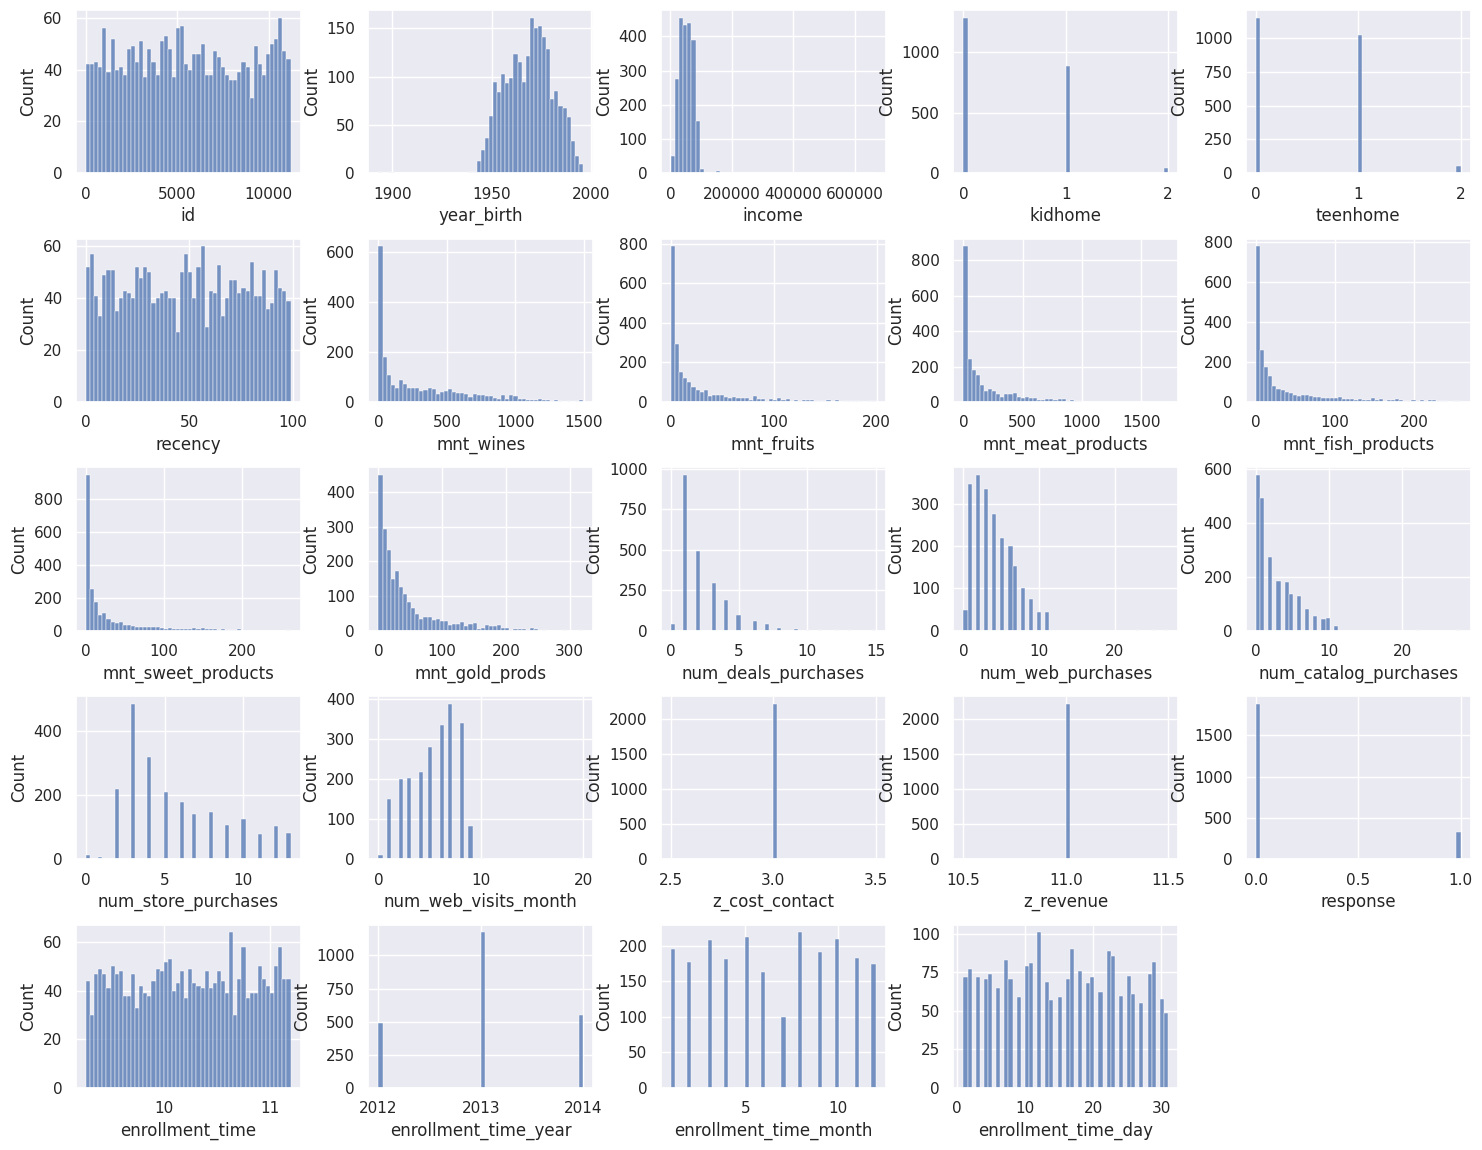

In [123]:
# sets the plot size
plt.figure(figsize=(18,14))

# initalizes the subplot counter
n = 1

# plots the histograms
for feature in num_attri.columns:
    plt.subplot(5, 5, n)
    _ = sns.histplot(num_attri[feature], bins=50)
    n += 1


# adjusts the spaces between plots
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.4)

# displays the plot
plt.show()

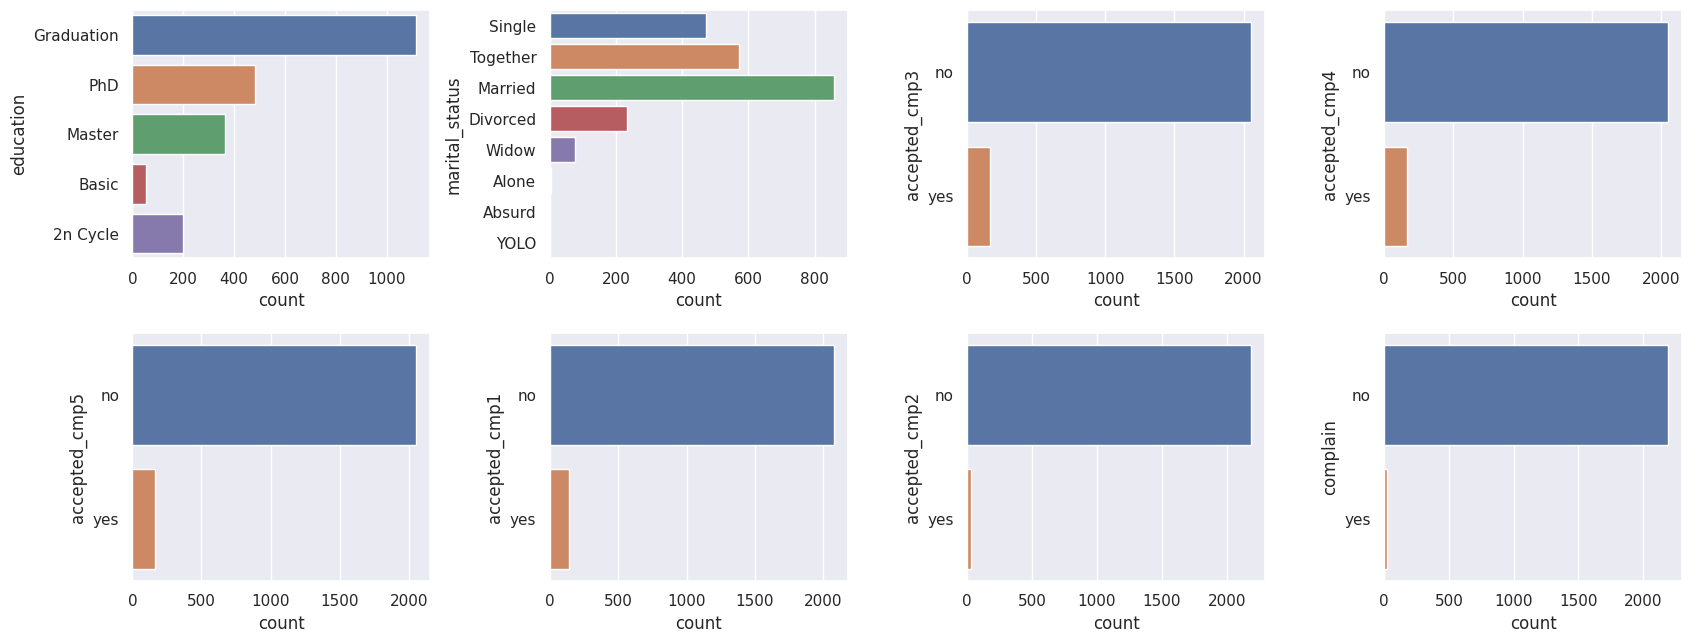

In [124]:
# sets the plot size
plt.figure(figsize=(20,20))

# initalizes the subplot counter
n = 1

# plots the counts
for feature in cat_attri.columns:
    plt.subplot(5, 4, n)
    _ = sns.countplot(y=cat_attri[feature])
    n += 1

# adjusts the spaces between plots
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.3)


# displays the plot
plt.show()

<ipython-input-125-644e0133a6cf>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlations, dtype=np.bool))


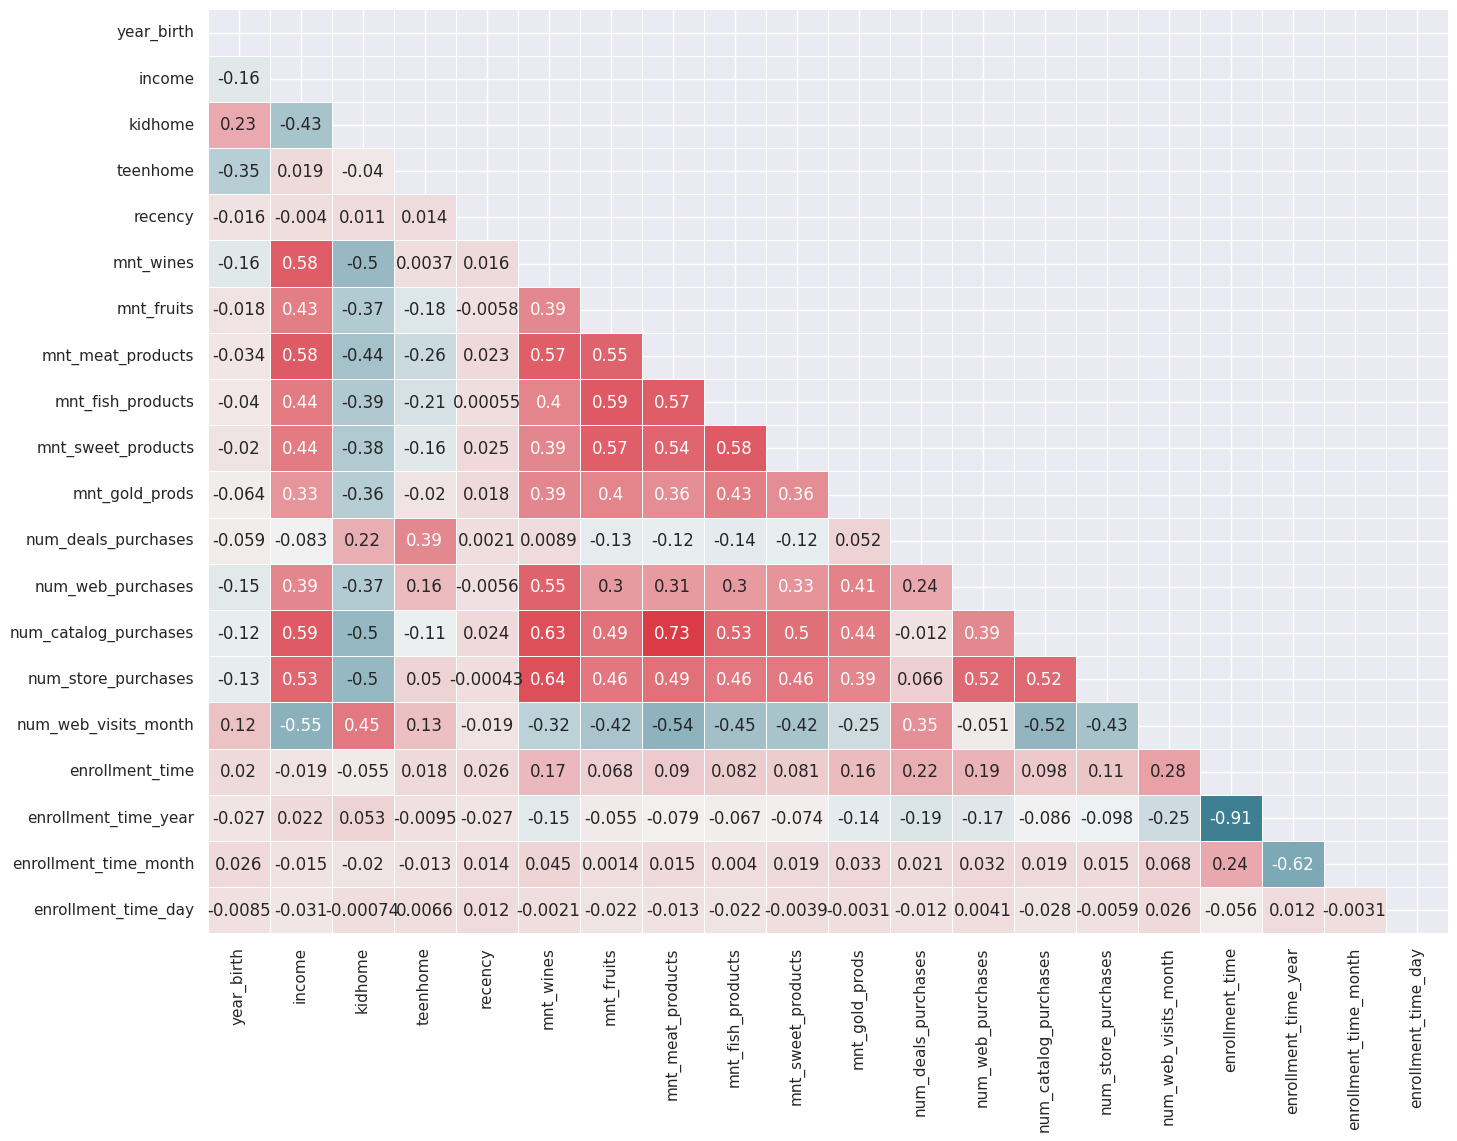

In [125]:
# keeps only the numerical attributes that are measures
# this excludes: binary, target, id, z_cost_contact, z_revenue
num_attributes = num_attri.drop(['id','z_cost_contact','z_revenue', 'response'], axis=1)

# calcultes the correlations
correlations = num_attributes.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(16, 12)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlations, cmap=cmap, mask=mask, linewidths=.5, annot=True, cbar=False)

# displays the plot
plt.show()

In [126]:
#A  Data preprocessing

dfc = pd.read_csv('data/customer_fe.csv')
df.shape

(2216, 33)

In [127]:
df_id=dfc[['id']]
df_target=dfc[['response']]


In [128]:
dfc.drop(['id','dt_customer','z_cost_contact','z_revenue'],axis=1,inplace=True
         )
dfc.sample(3)

,year_birth,education,marital_status,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,response,enrollment_time,enrollment_time_year,enrollment_time_month,enrollment_time_day
400,1987,Graduation,Single,"46,923.000000",1,0,90,85,44,54,102,78,6,3,5,1,7,7,no,no,no,no,no,no,0,11.126027,2012,8,22
1638,1978,Master,Single,"35,544.000000",1,0,77,30,5,23,4,1,4,1,2,0,3,7,no,no,no,no,no,no,0,9.583562,2014,3,8
1339,1987,Graduation,Together,"18,227.000000",1,0,21,1,2,7,4,3,11,1,0,1,2,8,no,no,no,no,no,no,0,10.912329,2012,11,8


In [129]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
mms = MinMaxScaler()

# Fit the scaler to your data (compute min and max)
mms.fit(num_attri)

# Transform your data using the fitted scaler
num_attri_scaled = mms.transform(num_attri)

# Convert the scaled data back to a DataFrame with column names
num_attri_scaled = pd.DataFrame(num_attri_scaled, columns=num_attri.columns)

import pickle

import os

# Create the 'parameter' directory if it doesn't exist
if not os.path.exists('parameter'):
    os.makedirs('parameter')



pickle.dump(mms,open('parameter/min_max_scaler.pkl','wb'))


In [130]:
# ONE HOT ENCODING
# converts the values 'No'and 'Yes' to 0s and 1s
binary_attributes['accepted_cmp1'] = binary_attributes['accepted_cmp1'].apply(lambda x: 1 if x == 'Yes' else 0)
binary_attributes['accepted_cmp2'] = binary_attributes['accepted_cmp2'].apply(lambda x: 1 if x == 'Yes' else 0)
binary_attributes['accepted_cmp3'] = binary_attributes['accepted_cmp3'].apply(lambda x: 1 if x == 'Yes' else 0)
binary_attributes['accepted_cmp4'] = binary_attributes['accepted_cmp4'].apply(lambda x: 1 if x == 'Yes' else 0)
binary_attributes['accepted_cmp5'] = binary_attributes['accepted_cmp5'].apply(lambda x: 1 if x == 'Yes' else 0)
binary_attributes['complain'] = binary_attributes['complain'].apply(lambda x: 1 if x == 'Yes' else 0)

In [131]:
# filters the categorical attributes
cat_attri= cat_attri[['education','marital_status']]

In [132]:
cat_attributes=cat_attri.copy()

In [133]:
# As observed, there are many unique levels for each feature. Thus, One Hot Encoding won't be a good method as it will considerably increase the data set dimensi
# FREQUENCY ENCODIG
# creates a dictionary from value counts
count_dict_education = cat_attributes['education'].value_counts().to_dict()

# stores values as DataFrame
df_count_education = pd.DataFrame(count_dict_education.items(), columns=['Value','Count'])

# calculates the frequency for each value
df_count_education['frequency'] = df_count_education['Count'] / df_count_education['Count'].sum()



# creates a dictionary from value counts
count_dict_marital = cat_attributes['marital_status'].value_counts().to_dict()

# stores values as DataFrame
df_count_marital = pd.DataFrame(count_dict_marital.items(), columns=['Value','Count'])

# calculates the frequency for each value
df_count_marital['frequency'] = df_count_marital['Count'] / df_count_marital['Count'].sum()

In [134]:
# gets a dictionary for the frequency
frequency_education = df_count_education.set_index('Value').to_dict()['frequency']

# gets a dictionary for the frequency
frequency_marital = df_count_marital.set_index('Value').to_dict()['frequency']
# creates an empty DataFrame

In [135]:
# creates an empty DataFrame
cat_attributes_encoded = pd.DataFrame()

# creates a column for frequency
cat_attributes_encoded['education'] = cat_attributes['education'].map(frequency_education)
cat_attributes_encoded['marital_status'] = cat_attributes['marital_status'].map(frequency_marital)

In [136]:
# joins the data sets
df_customer_prep = pd.concat([df_id, df_target, num_attri_scaled, binary_attributes, cat_attributes_encoded], axis=1)

In [137]:
# saves data set state
df_customer_prep.to_csv('data/customer_prep.csv', index=False)

In [138]:
df_customer=df_customer_prep.copy()

In [139]:
# loads data sets
df_customer_prep = pd.read_csv('data/customer_prep.csv')
df_customer_fe = pd.read_csv('data/customer_fe.csv')

In [140]:
df_customer_prep.shape

(2216, 34)

In [141]:
df_customer_fe.shape

(2216, 33)

In [142]:
# Saves the id column for later usage
col_id = df_customer_prep[['id']].copy()

# Drops the id as it will not be used
df_customer_prep.drop('id', axis=1, inplace=True)

# Reorders columns based on the common columns
common_columns = df_customer_prep.columns.intersection(df_customer_fe.columns)
df_customer_fe = df_customer_fe[common_columns]


In [144]:
# Check the column names in df_customer_prep
print(df_customer_prep.columns)

# Drops redundant columns that exist in the DataFrame
columns_to_drop = ['response', 'accepted_cmp1', 'accepted_cmp2', 'accepted_cmp3',
                   'accepted_cmp4', 'accepted_cmp5', 'complain', 'year_birth',
                   'dt_enrollment_year', 'dt_enrollment_month', 'dt_enrollment_day']

# Check if the columns to drop exist in the DataFrame
existing_columns = set(columns_to_drop).intersection(df_customer_prep.columns)

# Drop the existing columns
df_customer_prep.drop(existing_columns, axis=1, inplace=True)


Index(['response', 'id.1', 'year_birth', 'income', 'kidhome', 'teenhome',
       'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products',
       'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods',
       'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases',
       'num_store_purchases', 'num_web_visits_month', 'z_cost_contact',
       'z_revenue', 'response.1', 'enrollment_time', 'enrollment_time_year',
       'enrollment_time_month', 'enrollment_time_day', 'accepted_cmp3',
       'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1', 'accepted_cmp2',
       'complain', 'education', 'marital_status'],
      dtype='object')


In [145]:
# gets a random sample
df_customer_fe.sample(random_state=SEED)

,response,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,z_cost_contact,z_revenue,enrollment_time,enrollment_time_year,enrollment_time_month,enrollment_time_day,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,education,marital_status
948,0,1962,"52,597.000000",0,1,69,492,0,37,7,0,42,3,6,3,8,5,3,11,9.419178,2014,5,7,no,no,no,no,no,no,PhD,Single


In [146]:
# gets a random sample
df_customer_prep.sample(random_state=SEED)

,id.1,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,z_cost_contact,z_revenue,response.1,enrollment_time,enrollment_time_year,enrollment_time_month,enrollment_time_day,education,marital_status
948,0.324815,0.076499,0.000000,0.500000,0.696970,0.329538,0.000000,0.021449,0.027027,0.000000,0.130841,0.200000,0.222222,0.107143,0.615385,0.250000,0.000000,0.000000,0.000000,0.075823,1.000000,0.363636,0.200000,0.217058,0.212545


4.2 Finding the right number of clusters for K-Means

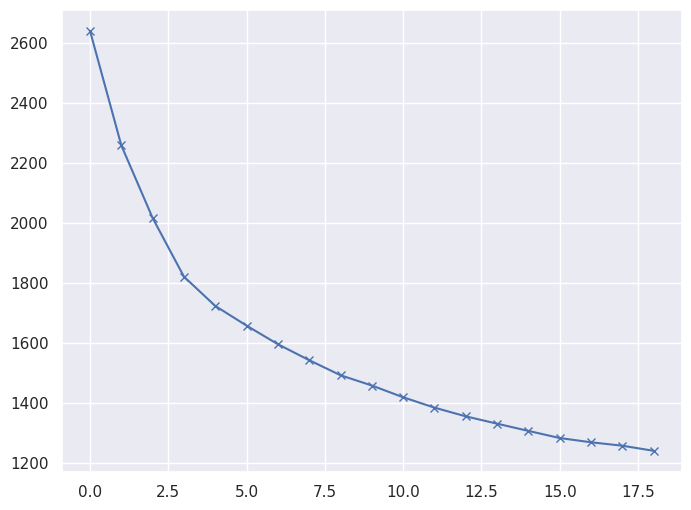

In [149]:
#4.2 Finding the right number of clusters for K-Means

wcss_score=[]
range_values=range(1,20)

for value in range_values:
  kmeans=KMeans(n_clusters=value,n_init=10,max_iter=300,random_state=SEED)

  kmeans.fit_predict(df_customer_prep)

  wcss_score.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(wcss_score,'bx-')

plt.show()

In [156]:
# sets seaborn default style
sns.set()

# disable max columns limit
pd.set_option('display.max_columns', 70)

# sets to not crop long vlaues for rows
pd.set_option("display.max_colwidth", 70)

# sets format to suppress scientific notation
pd.options.display.float_format = '{:,.6f}'.format

# sets the global seed
SEED = 42


def get_clustering_scores(n_clusters, dataset):
    # instantiates the model and predicts the labels
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(dataset)

    # calculates the scores
    silhouette = silhouette_score(dataset, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(dataset, labels)
    calinski_harabasz = calinski_harabasz_score(dataset, labels)

    return silhouette, davies_bouldin, calinski_harabasz


def calculate_clusters_stability(n_sets, n_clusters, dataset):
    sets = np.array_split(dataset, n_sets)

    # creates an accumulator for each metric
    s_scores = []
    db_scores = []
    calinski_scores = []

    # calculates the scores and store in their respective list
    for element in sets:
        s, dbs, calinski = get_clustering_scores(n_clusters, element)

        s_scores.append(s)
        db_scores.append(dbs)
        calinski_scores.append(calinski)

    print(f'Standard deviation for {n_clusters} clusters:\nSilouette: {np.std(s_scores)}\nDavies Bouldin: {np.std(db_scores)}\nCalinski Harabasz: {np.std(calinski_scores)}\n')


In [158]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

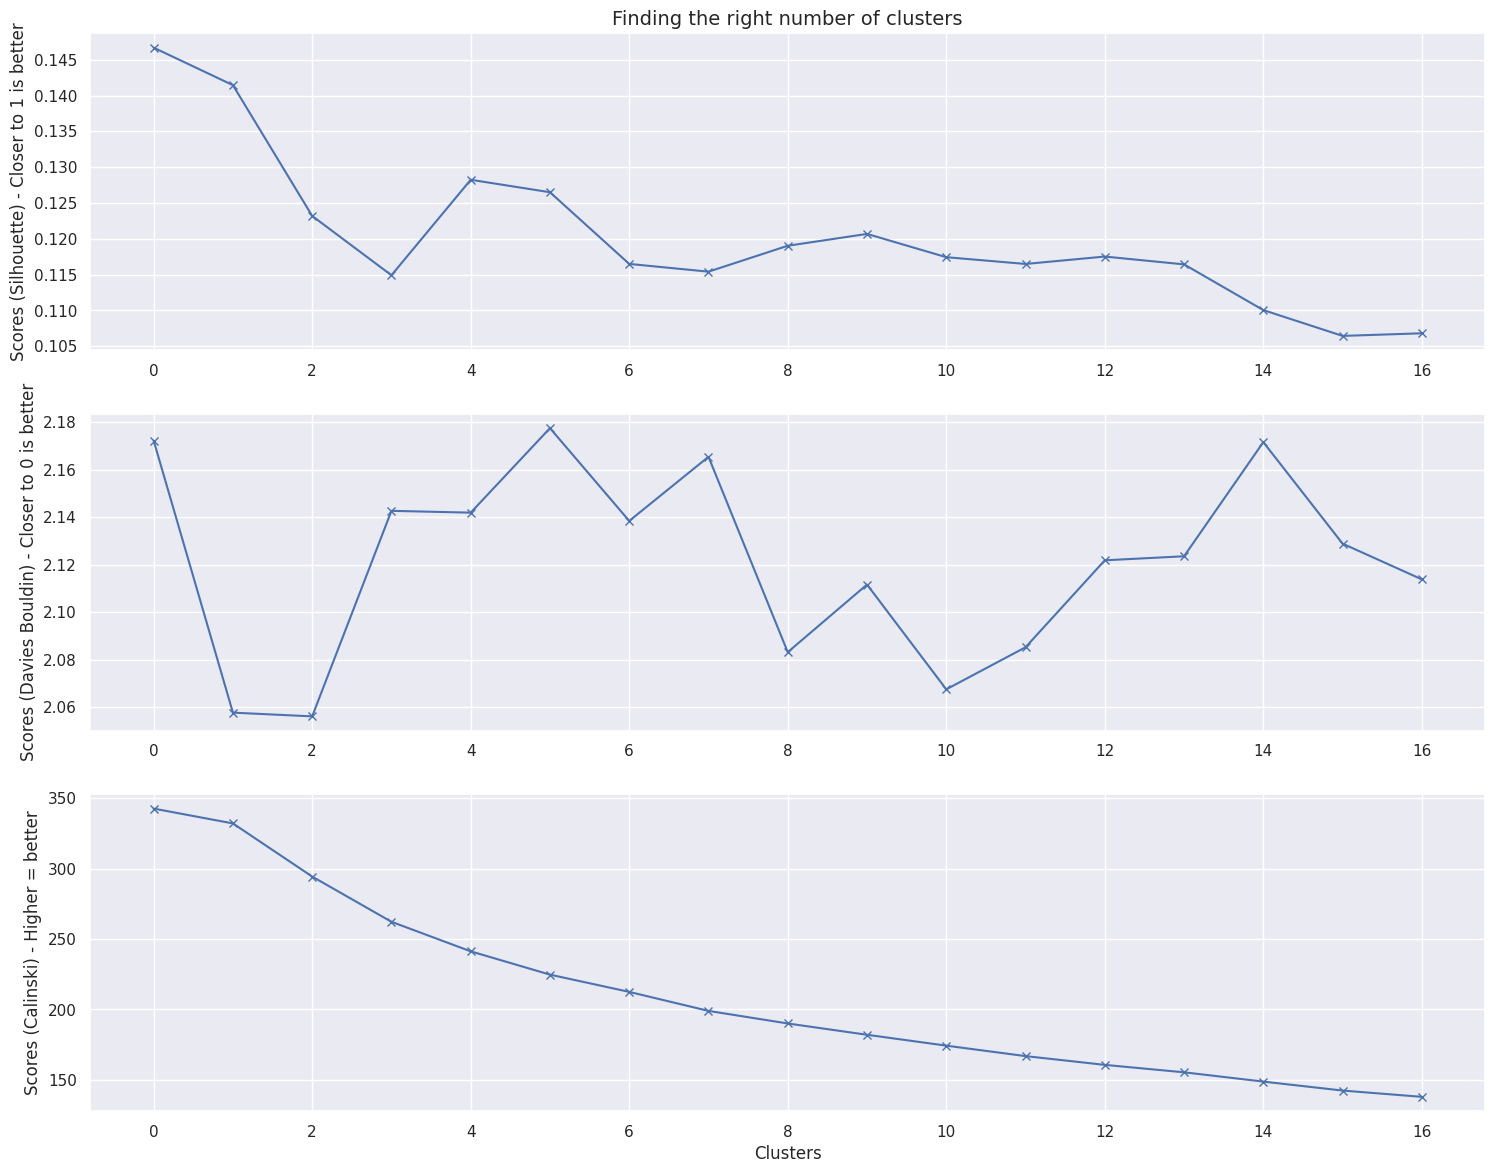

In [159]:
# creates an accumulator for each metric
s_scores = []
db_scores = []
calinski_scores = []

# sets the number of turns
range_values = range(3,20)

for value in range_values:
    # calculates KMeans and get the scores
    s, db, cal = get_clustering_scores(value, df_customer_prep)

    # stores the metrics
    s_scores.append(s)
    db_scores.append(db)
    calinski_scores.append(cal)
# sets the figure size
plt.figure(figsize=(18,14))

# plots the wcss scores
plt.subplot(3,1,1)
plt.plot(s_scores, 'bx-')

# sets the plot features
plt.title('Finding the right number of clusters', fontsize=14)
plt.ylabel('Scores (Silhouette) - Closer to 1 is better')


# plots the wcss scores
plt.subplot(3,1,2)
plt.plot(db_scores, 'bx-')

# sets the plot features
plt.ylabel('Scores (Davies Bouldin) - Closer to 0 is better')


# plots the wcss scores
plt.subplot(3,1,3)
plt.plot(calinski_scores, 'bx-')

# sets the plot features
plt.xlabel('Clusters')
plt.ylabel('Scores (Calinski) - Higher = better')

# displays the plot
plt.show()

Notes on Davies Bouldin Index
These conditions constrain the index so defined to be symmetric and non-negative. Due to the way it is defined, as a function of the ratio of the within cluster scatter, to the between cluster separation, a lower value will mean that the clustering is better. It happens to be the average similarity between each cluster and its most similar one, averaged over all the clusters, where the similarity is defined as Si above. This affirms the idea that no cluster has to be similar to another, and hence the best clustering scheme essentially minimizes the Davies–Bouldin index.

In [160]:
# sets the number os splits for the data
N_SETS = 20
for N_CLUSTERS in np.arange(5):
    # calculates the standard deviation for each score
    calculate_clusters_stability(N_SETS, N_CLUSTERS+2, df_customer_prep)

Standard deviation for 2 clusters:
Silouette: 0.025147595004195607
Davies Bouldin: 0.14765220404168977
Calinski Harabasz: 2.2557947287967446

Standard deviation for 3 clusters:
Silouette: 0.014825256723025697
Davies Bouldin: 0.08432516847407552
Calinski Harabasz: 1.5414045948852566

Standard deviation for 4 clusters:
Silouette: 0.015832233901863415
Davies Bouldin: 0.100520399227244
Calinski Harabasz: 1.4543047141963454

Standard deviation for 5 clusters:
Silouette: 0.013198808515159416
Davies Bouldin: 0.08908545067680994
Calinski Harabasz: 1.2757066953479228

Standard deviation for 6 clusters:
Silouette: 0.011329448607459235
Davies Bouldin: 0.08388022820847371
Calinski Harabasz: 1.1771850578643248



In [161]:
# sets the number of clusters
N_CLUSTERS = 5

# instantiates cluster algorithm
kmeans = KMeans(n_clusters=N_CLUSTERS, n_init=10, max_iter=300, random_state=SEED)

# finds the clusters
labels = kmeans.fit_predict(df_customer_prep)

In [162]:
# calculates KMeans and get the scores
s, db, cal = get_clustering_scores(N_CLUSTERS, df_customer_prep)
print(f'Silouette: {s}\nDavies Bouldin: {db}\nCalinski Harabasz: {cal}\n')

Silouette: 0.12319068526217511
Davies Bouldin: 2.056130470600554
Calinski Harabasz: 294.3756056331042



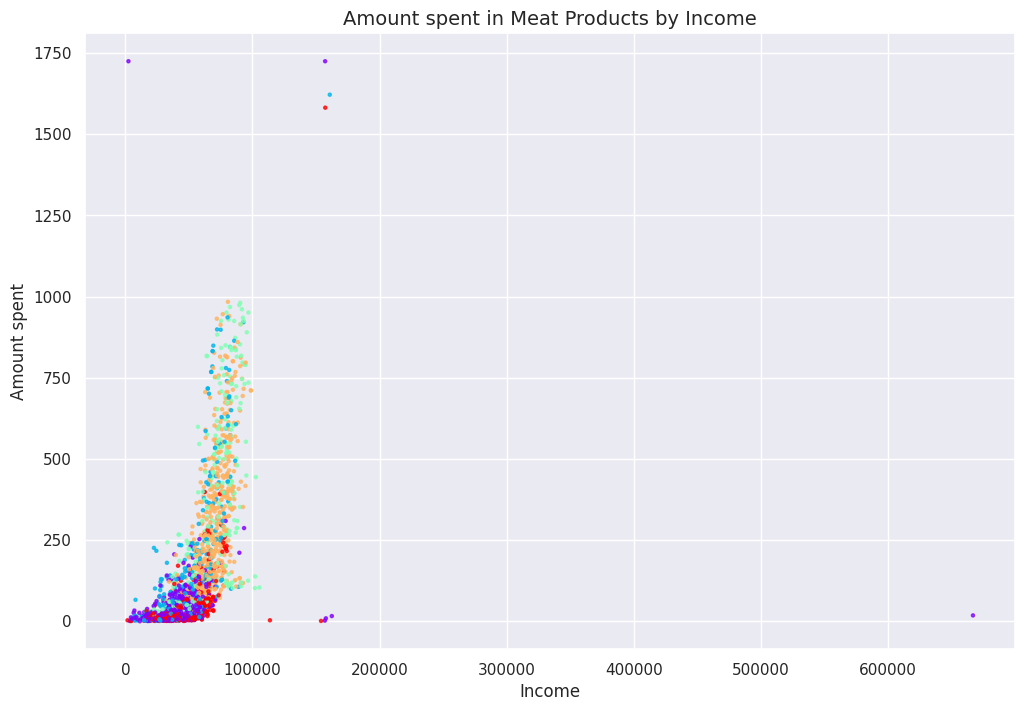

In [163]:
# sets the plot size
plt.figure(figsize=(12,8))

# plots a scatter plot to view the clusters
plt.scatter(x=df_customer_fe['income'], y=df_customer_fe['mnt_meat_products'], c=labels, s=5, cmap='rainbow', alpha=0.75)

# sets the plot features
plt.xlabel('Income')
plt.ylabel('Amount spent')
plt.title("Amount spent in Meat Products by Income", fontsize=14)

# displays the plot
plt.show()

In [164]:
# creates a column with respective labels
df_customer_fe['cluster'] = labels

In [166]:
# checks the data set dimensions
df_customer_prep.shape

(2216, 25)

Now we have the value of each of the 25 attributes of the 5 clusters. We'll observe the variance of the centroids for a given attribute, that is, we'll collect an attribute and check how it behaves in different clusters.

As we'll analyze the variance, we'll look for an attribute that the values differ between the clusters, as this will increase the chance of observing the particularities of each group.

Those attributes that have the highest variance will be the ones used for our analysis.

In [167]:
# gets the centroids
centroids = kmeans.cluster_centers_

In [168]:
# printing a sample of centroids
print(centroids[:, 0])
print(centroids[:, 1])
print(centroids[:, 2])

[0.49257828 0.52000438 0.48383528 0.49254261 0.51301731]
[0.05738298 0.07141261 0.08991051 0.10311417 0.06289481]
[0.35691574 0.20140845 0.15408805 0.02799228 0.32828283]


In [169]:
# gets the max number of attributes
max_att = len(centroids[0])
feature_name = []
centroid_var = []

# calculates the variance for each feature centroid
for i in range(max_att):
    feature_name.append(df_customer_prep.columns.values[i])
    centroid_var.append(centroids[:, i].var())

# creates a DataFrame for better visualization
df_feat_cent_vars = pd.DataFrame({'feature_name': feature_name, 'centroid_var':centroid_var})
df_feat_cent_vars.sort_values(by='centroid_var', ascending=False)

,feature_name,centroid_var
18,response.1,0.157199
20,enrollment_time_year,0.107514
19,enrollment_time,0.064469
21,enrollment_time_month,0.035295
14,num_store_purchases,0.022031
5,mnt_wines,0.016113
2,kidhome,0.014366
8,mnt_fish_products,0.011787
6,mnt_fruits,0.009753
9,mnt_sweet_products,0.005770


In [170]:
# get the values for each col grouped by cluster
values_to_compare = ['mnt_meat_products', 'mnt_fish_products', 'mnt_wines',
                     'num_catalog_purchases','num_store_purchases', 'income']
description = df_customer_fe.groupby('cluster')[values_to_compare]


# calculates the number of customers in each cluster
n_customers = description.size()

# calculates the mean for each value in each cluster
description = description.mean()

description['n_customers'] = n_customers

# sets format to suppress scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# displays the summary
round(description, 2)

,mnt_meat_products,mnt_fish_products,mnt_wines,num_catalog_purchases,num_store_purchases,income,n_customers
cluster,,,,,,,
0,40.95,8.65,97.01,0.93,3.79,"39,886.01",629
1,175.36,41.41,357.80,2.71,6.25,"49,214.81",355
2,306.17,53.91,524.60,4.35,6.25,"61,514.74",318
3,323.93,82.41,531.85,5.02,9.08,"70,294.33",518
4,42.66,8.68,115.46,0.99,3.94,"43,551.02",396


In [172]:
# rounds to 2 decimal numbers
round(description, 2)

# sets format to suppress scientific notation
pd.options.display.float_format = '{:,.2f}'.format

description

,mnt_meat_products,mnt_fish_products,mnt_wines,num_catalog_purchases,num_store_purchases,income,n_customers
cluster,,,,,,,
0,40.95,8.65,97.01,0.93,3.79,"39,886.01",629
1,175.36,41.41,357.80,2.71,6.25,"49,214.81",355
2,306.17,53.91,524.60,4.35,6.25,"61,514.74",318
3,323.93,82.41,531.85,5.02,9.08,"70,294.33",518
4,42.66,8.68,115.46,0.99,3.94,"43,551.02",396


CLUSTER 0:

Least number of customers
Relatively large number of purchases through stores
Relatively large amount spent on wine products
Median income
Don't make much catalog purchases

CLUSTER 1:

Lowest income
Largest number of customers
Not used to make catalog purchases
Least amount spent on wine products

CLUSTER 2:

Highest income
Largest amount spent on all products
Largest amount on purchases
Relatively moderate number of customers

CLUSTER 3:

Large amount spent on meat products
Large amount spent on wine products
Spends moderate amount on fish products
Large number of store purchases
High income
Moderate number of customers

CLUSTER 4:

Fewest amount spent on meat products
Fewest amount spent on fish products
Spends more on wine products
Not used to make catalog purchases

STRATEGY

Cluster 2
The most suitable group for this. After all it has a high number of customers, they spend a lot on products (most wine and meats). So, we can launch a campaign combining these two types of products by engaging this group to buy more of these through catalogs and stores.

We want these customers to spend more to increase the company profit. Suppose the strategy is to partner with a rewards company that provides benefits to the customer who buys a fondue kit combining meat, cheese and wine.

To check if our strategy was effective, we'll run an A/B test. We'll divide Cluster 2 customers into two: the control group and the test group.

The control group will remain unchanged, that is, there will be no rewards program. The test group, in a defined period, will participate in the rewards program.

At the end of the period, we'll check if the people who participated in the rewards program spent more on these products. So we'll have a reliable result, with customers with similar characteristics.

Other interesting clusters